In [39]:
from itertools import product

In [40]:
B = BraidGroup(3)
sigma1, sigma2 = B.gens()

In [41]:
def paint(b) : 
    return b.plot(orientation = 'top-bottom')

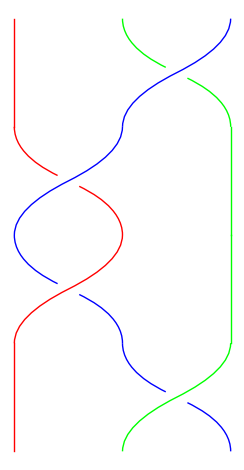

In [42]:
a = sigma2.inverse() * sigma2.inverse() * sigma1.inverse() * sigma1.inverse() #A_02
b = sigma2.inverse() * sigma1.inverse() * sigma1.inverse() * sigma2.inverse() #A_03

b.plot(orientation = 'top-bottom')

In [43]:
def Burau(x):
    return x.burau_matrix()

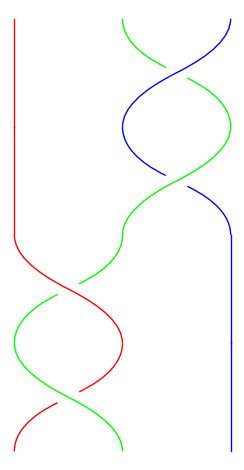

In [44]:
tildeA_02 = sigma2.inverse() *sigma2.inverse() *sigma1 * sigma1
tildeA_02.plot(orientation = 'top-bottom')

In [49]:
def commutator(x, y):
    return x * y * x.inverse() * y.inverse()
def conj(x, y) :
    return x * y * x.inverse()

conj(a * b * b * a, b) == conj(tildeA_02 * tildeA_02, b)

True

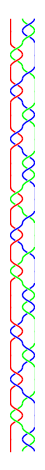

In [50]:
paint(conj(a * b * b * a, b))

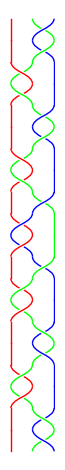

In [51]:
paint(conj(tildeA_02 * tildeA_02, b))

True
True
True


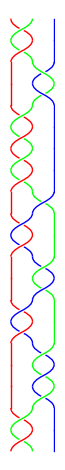

In [19]:
x = tildeA_02.inverse() * tildeA_02.inverse() * a * b * b * a

# [abba, b] = [tA02^2, tA03] 
print((a * b * b * a) * b * (a.inverse() * b.inverse() * b.inverse() * a.inverse()) * b.inverse() == tildeA_02 * tildeA_02 * b * tildeA_02.inverse() * tildeA_02.inverse() * b.inverse())

# b^(ab^2a) = b^(tA02^2)
print(a * b * b * a * b * (a.inverse() * b.inverse() * b.inverse() * a.inverse()) == tildeA_02 * tildeA_02 * b * tildeA_02.inverse() * tildeA_02.inverse())

# tA02^-2 ab^2a commutes with b
print(x * b == b * x)
paint(x )

In [33]:
# # Burau representation (non-reduced)
# Burau = B.burau_matrix

c = tildeA_02 * tildeA_02 * b * tildeA_02.inverse() * tildeA_02.inverse() * b.inverse()
# c = sigma1.inverse() * sigma1.inverse() * sigma2.inverse() * sigma2.inverse()
# Get the Burau representation of c
target_matrix = Burau(c)
# print(target_matrix)

# Set a maximum word length
max_length = 6
# tildeA_02.plot(orientation = 'top-bottom')
# c.plot(orientation = 'top-bottom')

In [34]:
generators = [a, b, a.inverse(), b.inverse()]
labels = ['a', 'b', 'A', 'B']  # 'A' means a^-1, 'B' means b^-1

In [35]:
found = False
for length in range(1, max_length + 1):
    for word_indices in product(range(4), repeat=length):
        word = B.one()
        word_label = ""
        for i in word_indices:
            word *= generators[i]
            word_label += labels[i]
        word_ = word * b * word.inverse() * b.inverse()
        # if Burau(word) == target_matrix:
        if Burau(word_) == target_matrix:
            print(f"Found match: {word_label}")
            found = True
            break
    if found:
        break

if not found:
    print("No match found within the given word length.")

Found match: abba


In [75]:
def commutator(x, y): 
    return x * y * x.inverse() * y.inverse()
def commutator_with_b(x) :
    return commutator(x, b)

In [44]:
def compare(x, y):
    return (Burau(x) == Burau(y))

In [108]:
c_ = commutator(tildeA_02 * tildeA_02, b * b)
Bcb = b * commutator(a * b * b * a, b) * b.inverse()

# x1 = [abba, b] 
x1 = commutator(a * b * b * a, b)

# x2 = BabbabABBA
x2 = b.inverse() * a * b * b * a * b * a.inverse() * b.inverse() * b.inverse() * a.inverse()

compare(x1 * Bcb, commutator(tildeA_02 * tildeA_02, b * b))
# compare(c, x2)
# compare(c_, x1*x2)


True

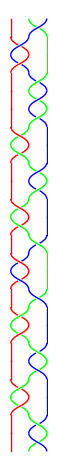

In [60]:
c.plot()

In [1]:
G.<x, y, z> = FreeGroup();